# Portuguese Banking Institution Term Deposit Subscription Prediction

## 1. Introduction
#### 1.1 Project Description
A Portuguese banking institution launched directed marketing campaigns to promote their products. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed or not. The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 41,118 clients. For each client, a number of attributed was stored and if there was a success (the target variable). For the project, 10,000 records are randomly allocated.

#### 1.2 Question of Interest
Based on the dataset, predict if the client will subscribe (yes/no) a term deposit (variable y).

#### 1.3 Variable Description 
##### Target Variable
| Variable Name | Description |
|---------------|-------------|
| `y` | Indicates if the client subscribed to a term deposit (binary: `yes`, `no`). |

##### Bank Client Data
| Variable Name | Description |
|---------------|-------------|
| `age` | Age of the client at the contact date. |
| `job` | Type of job (e.g., `admin.`, `blue-collar`, `entrepreneur`, `self-employed`, `services`, `student`, `technician`, `unemployed`). |
| `marital` | Marital status (`divorced`, `married`, `single`). **Note**: `divorced` includes widowed. |
| `education` | Education level (e.g., `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`). |
| `default` | Has credit in default? (binary). |
| `housing` | Has a housing loan? (binary). |
| `loan` | Has a personal loan? (binary). |

##### Last Contact Information
| Variable Name | Description |
|---------------|-------------|
| `contact` | Contact communication type (`cellular`, `telephone`). |
| `month` | Last contact month of the year (e.g., `jan`, `feb`). |
| `day_of_week` | Last contact day of the week (e.g., `mon`, `tue`). |
| `duration` | Last contact duration (seconds). **Important**: This attribute heavily affects the target variable (e.g., `duration=0` implies `y="no"`). **Note**: Duration is only known after the call and should be excluded for realistic predictive models. |

##### Other Attributes
| Variable Name | Description |
|---------------|-------------|
| `campaign` | Number of contacts performed during this campaign for the client. |
| `pdays` | Number of days since the client was last contacted from a previous campaign. |
| `previous` | Number of contacts performed before this campaign for the client. |
| `poutcome` | Outcome of the previous marketing campaign (`failure`, `nonexistent`, `success`). |

##### Social & Economic Context Attributes
| Variable Name | Description |
|---------------|-------------|
| `emp.var.rate` | Employment variation rate (quarterly indicator). |
| `cons.price.idx` | Consumer price index (monthly indicator). |
| `cons.conf.idx` | Consumer confidence index (monthly indicator). |
| `euribor3m` | Euribor 3-month rate (daily indicator). |
| `nr.employed` | Number of employees (quarterly indicator). |

#### 1.4 Loading Data

In [79]:
import pandas as pd
import numpy as np
import warnings

# Option 1: Ignore all warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('portuguese-bank-dataset.csv')
# Return the first 5 rows
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,24,services,single,professional.course,no,yes,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
1,38,technician,divorced,high.school,no,yes,yes,cellular,apr,thu,...,3,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,no
2,43,management,single,university.degree,no,yes,no,telephone,may,thu,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,no
3,34,technician,married,professional.course,no,no,no,cellular,aug,thu,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
4,37,unemployed,married,university.degree,no,no,yes,telephone,jul,fri,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no


## 2. Exploratory Data Analysis

### 2.1 Dataset Inspection

In [ ]:
# Initial inspection (include 'duration' in EDA)
print("="*50)
print("Step 1: Data Summary")
print("="*50)
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)


Step 1: Data Summary
Shape: (10000, 21)

First 5 rows:
   age         job   marital            education default housing loan  \
0   24    services    single  professional.course      no     yes   no   
1   38  technician  divorced          high.school      no     yes  yes   
2   43  management    single    university.degree      no     yes   no   
3   34  technician   married  professional.course      no      no   no   
4   37  unemployed   married    university.degree      no      no  yes   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   jul         wed  ...         1    999         0  nonexistent   
1   cellular   apr         thu  ...         3    999         1      failure   
2  telephone   may         thu  ...         2    999         0  nonexistent   
3   cellular   aug         thu  ...         3    999         0  nonexistent   
4  telephone   jul         fri  ...         3    999         0  nonexistent   

  emp.var.rate  cons.pric

#### 2.2 Missing Values


Missing values:
age                  0
job                 84
marital             25
education          402
default           2151
housing            241
loan               241
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


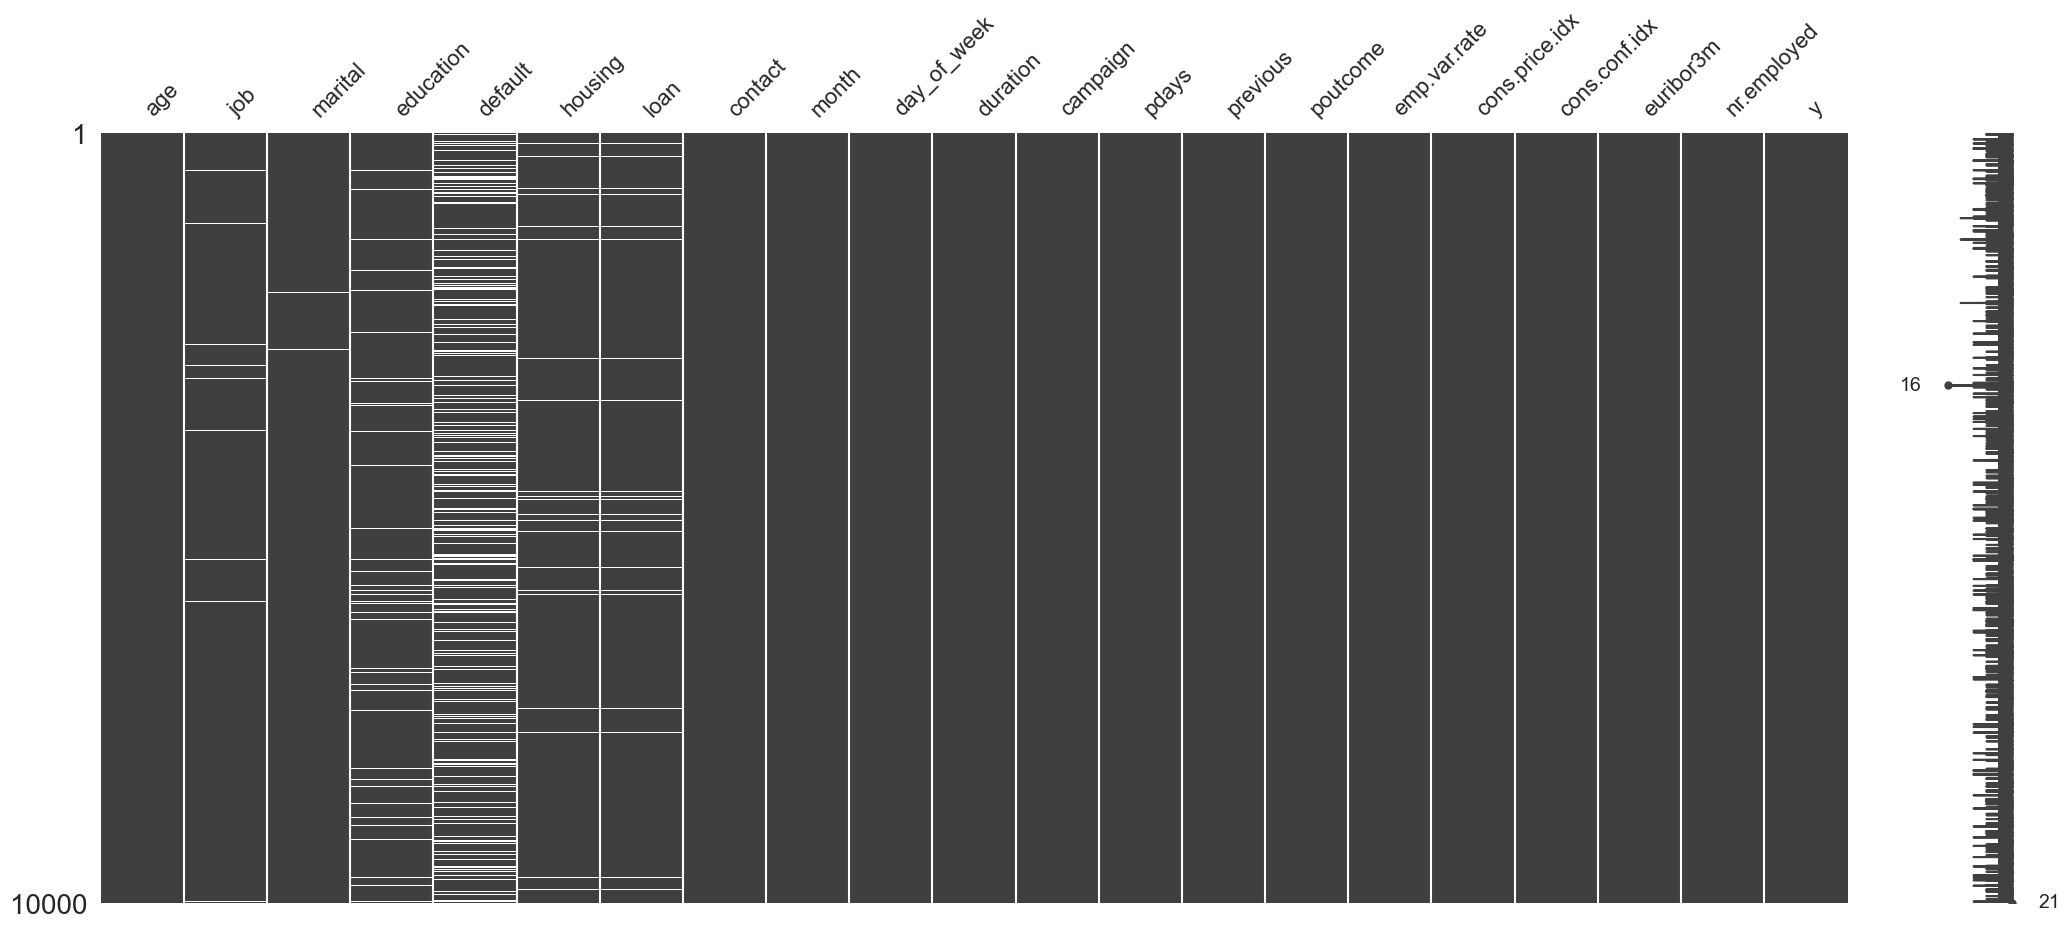

In [64]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

print("\nMissing values:")
print(df.isnull().sum() + (df == '').sum())  # Check both NaN and empty strings

# Set style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (12, 8)

# %% Missing Values Analysis
# Visualize missing values pattern
msno.matrix(df)
plt.show()

Upon inspection, there are 10,000 records in the dataset with 21 columns. Some columns have missing values, particularly the 'job', 'marital', 'education', 'default', 'housing', and 'loan' columns. The target variable 'y' indicates whether a client has subscribed to a term deposit. The initial inspection reveals that the dataset is relatively clean but requires handling of missing values. The numeric variables show a wide range of values, and the categorical variables have multiple levels that need to be encoded. The binary variables also need to be processed to handle missing values and convert them into a suitable format for modeling.

#### 2.3 Summary Statistics and Visualization

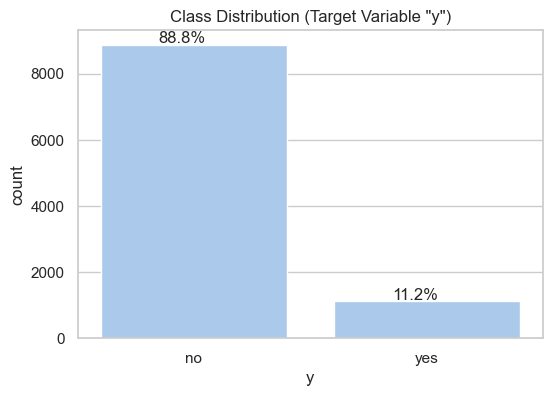

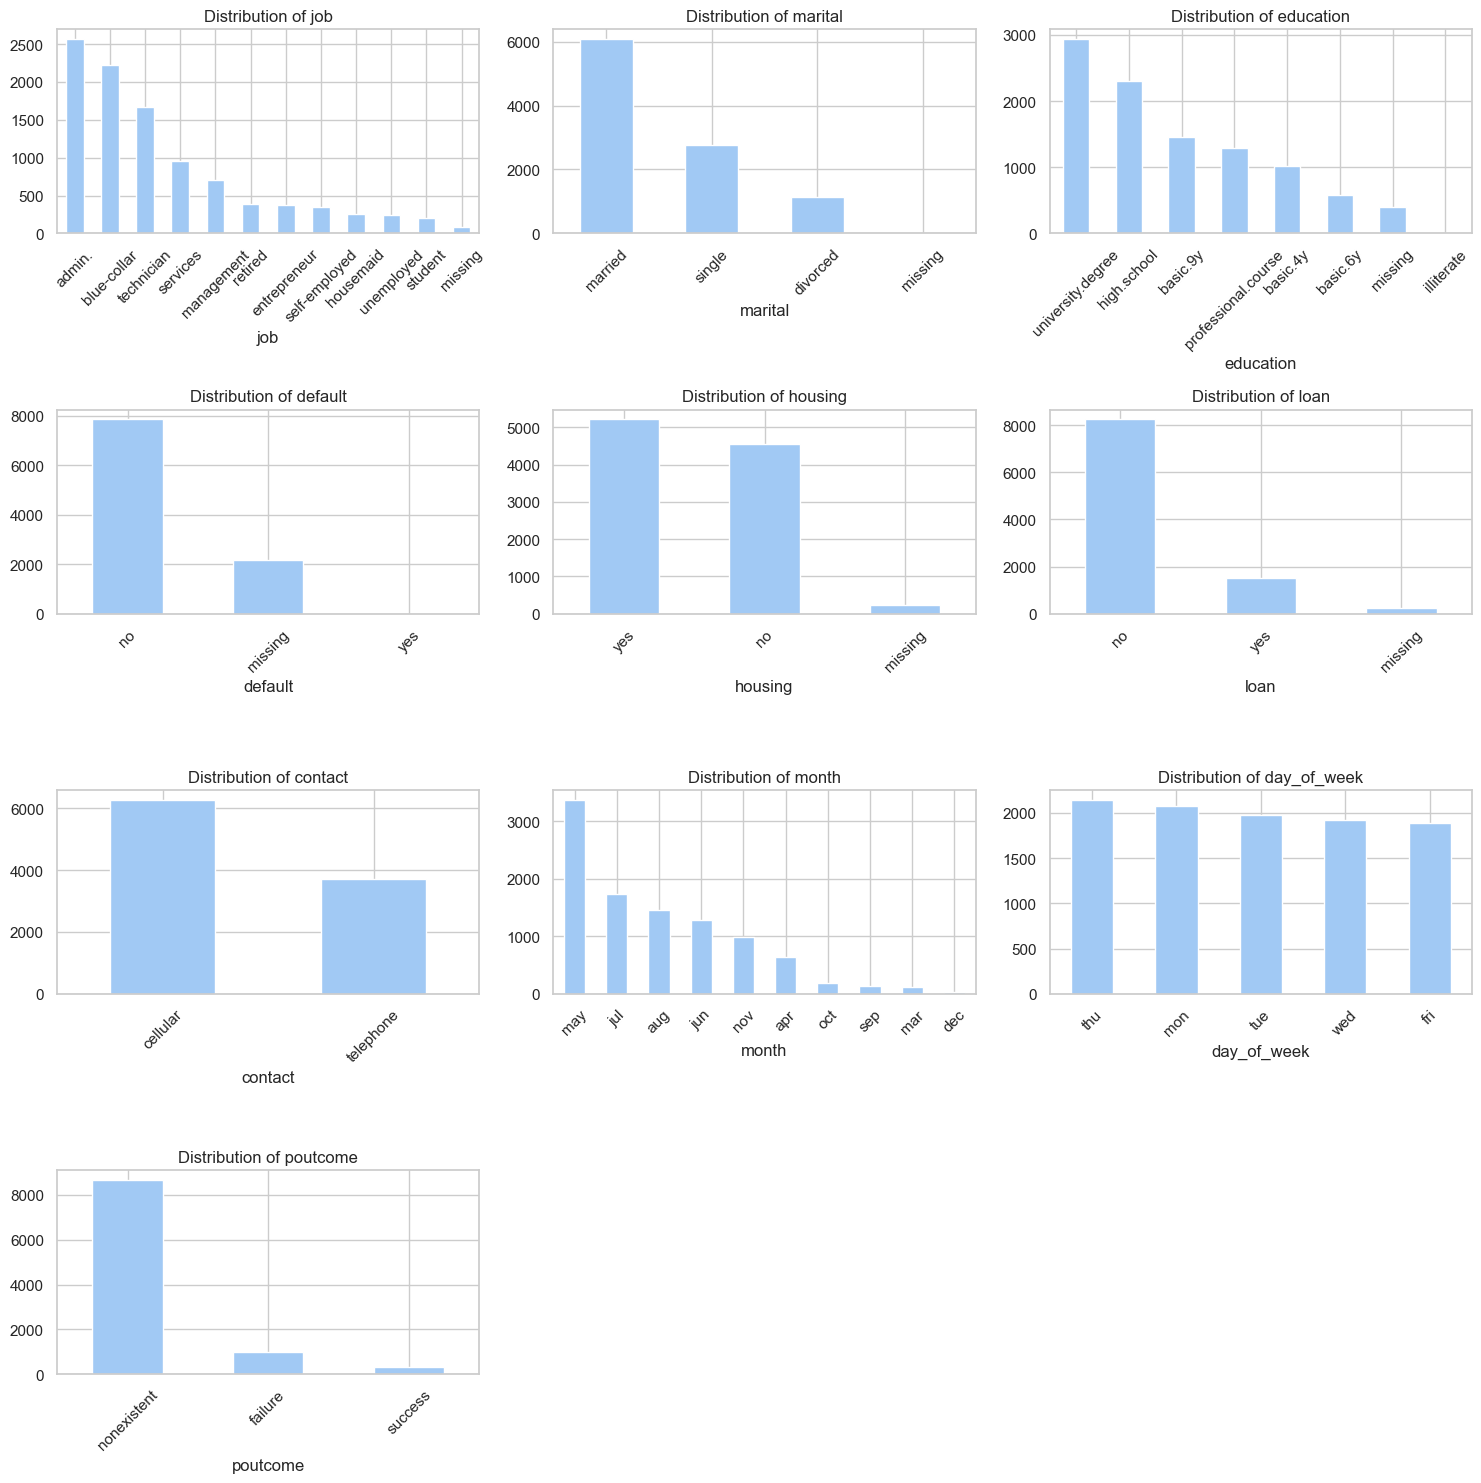

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
# ----- 2.1 Target Variable Distribution -----
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='y', data=df)
plt.title('Class Distribution (Target Variable "y")')

# Add percentage labels
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 50
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

# Plot the distribution of categorical variables
df_plot = df.copy()
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Treat missing values as a separate category
for var in cat_vars:
    df_plot[var] = df_plot[var].fillna('missing')

plt.figure(figsize=(15, 15))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(4, 3, i)
    df_plot[var].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
# Categorical Variables
def categorical_summary(df, cat_vars):
    summary = []
    for var in cat_vars:
        counts = df[var].value_counts(dropna=False)
        percents = df[var].value_counts(normalize=True, dropna=False).mul(100).round(1)
        summary_df = pd.DataFrame({'Count': counts, 'Percent (%)': percents})
        summary.append(summary_df)
    return summary

print("\n" + "="*50)
print("Categorical Variables Summary")
print("="*50)
cat_summaries = categorical_summary(df, cat_vars)
for var, summary in zip(cat_vars, cat_summaries):
    print(f"\nVariable: {var}")
    print(summary)


Categorical Variables Summary

Variable: job
               Count  Percent (%)
job                              
admin.          2566         25.7
blue-collar     2218         22.2
technician      1667         16.7
services         957          9.6
management       700          7.0
retired          394          3.9
entrepreneur     372          3.7
self-employed    350          3.5
housemaid        255          2.6
unemployed       237          2.4
student          200          2.0
NaN               84          0.8

Variable: marital
          Count  Percent (%)
marital                     
married    6076         60.8
single     2770         27.7
divorced   1129         11.3
NaN          25          0.2

Variable: education
                     Count  Percent (%)
education                              
university.degree     2937         29.4
high.school           2297         23.0
basic.9y              1455         14.6
professional.course   1293         12.9
basic.4y              10

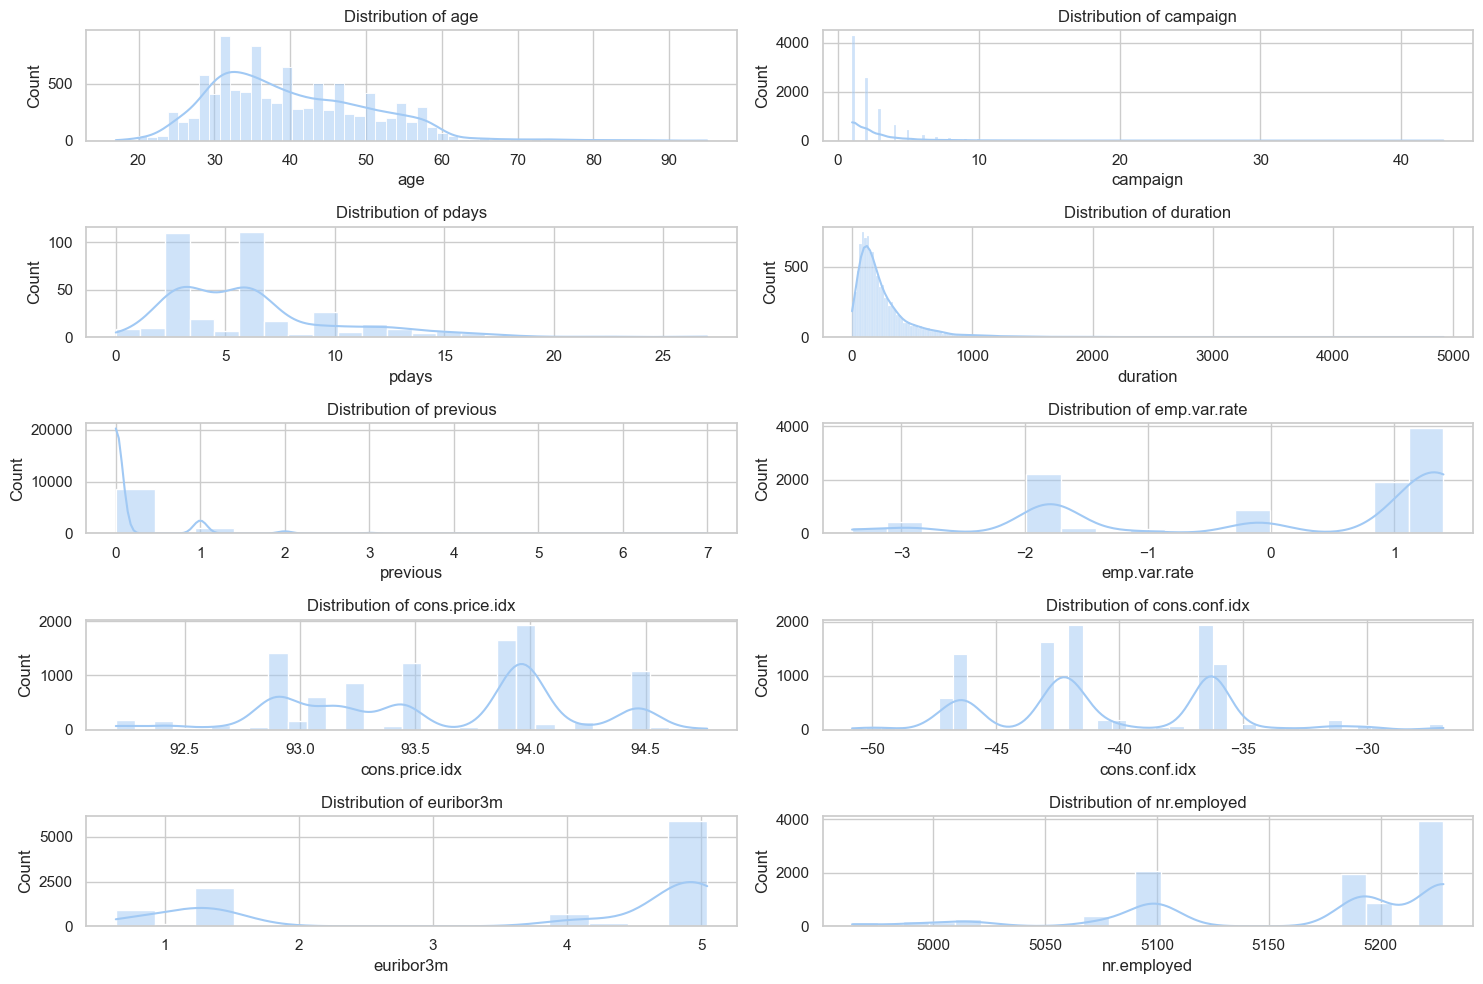

In [67]:
# ----- 2.3 Numeric Variables (Including Duration) -----
num_vars = ['age', 'campaign', 'pdays', 'duration', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
# make a copy of df
df_plot = df.copy()
# replace '999' with NaN in 'pdays'
df_plot['pdays'] = df_plot['pdays'].replace(999, np.nan)

# Histograms (include duration)
plt.figure(figsize=(15, 10))
for i, var in enumerate(num_vars, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df_plot[var], kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

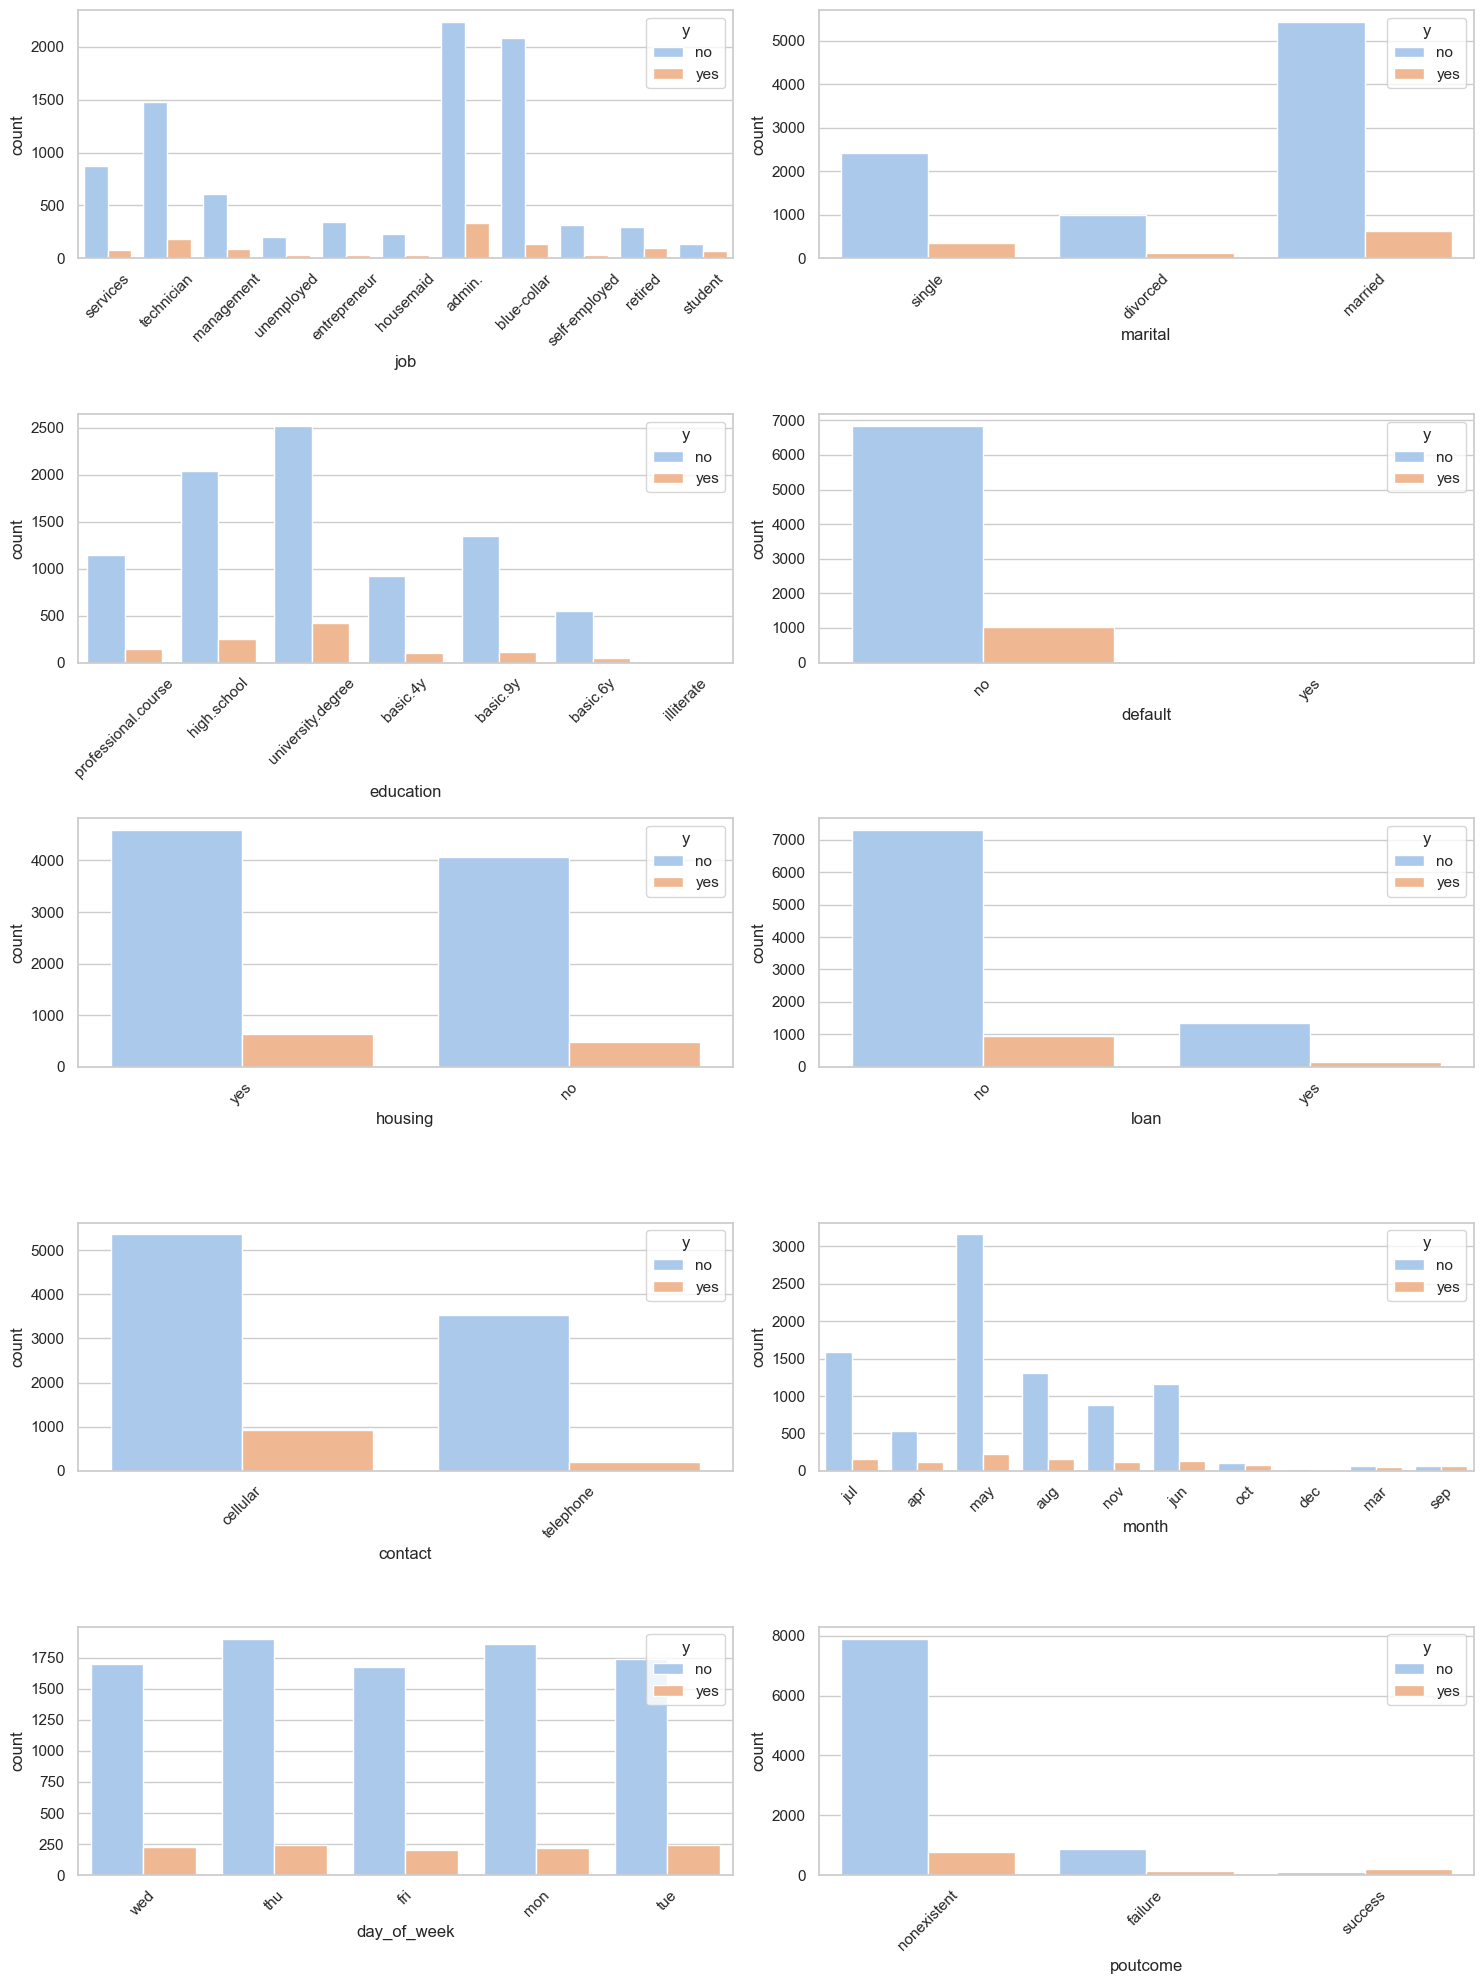

In [68]:
# Analyze categorical variables by target variable
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_vars):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=col, hue='y', data=df_plot)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [69]:
# List of categorical variables
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'month', 'day_of_week']
df_plot['y_numeric'] = df_plot['y'].map({'no': 0, 'yes': 1})

# Function to calculate subscription rate and sample size for each category, treating missing values as a separate category without modifying the original dataset
def subscription_rate(df, var):
    temp_df = df.copy()
    temp_df[var] = temp_df[var].fillna('missing').astype(str)  # Treat missing as explicit category
    rates = temp_df.groupby(var)['y_numeric'].agg(['mean', 'count']).reset_index()
    rates.columns = [var, 'Subscription Rate', 'Sample Size']
    return rates

# Create and display subscription rate tables for each categorical variable
for var in cat_vars:
    rates = subscription_rate(df_plot, var).sort_values(by='Subscription Rate', ascending=False)
    print(f"\nSubscription Rate by {var.capitalize()}:")
    print(rates)


Subscription Rate by Job:
              job  Subscription Rate  Sample Size
9         student           0.325000          200
6         retired           0.253807          394
11     unemployed           0.135021          237
4      management           0.131429          700
0          admin.           0.128605         2566
10     technician           0.112178         1667
5         missing           0.107143           84
3       housemaid           0.105882          255
7   self-employed           0.102857          350
8        services           0.086729          957
2    entrepreneur           0.072581          372
1     blue-collar           0.061767         2218

Subscription Rate by Marital:
    marital  Subscription Rate  Sample Size
3    single           0.127437         2770
2   missing           0.120000           25
0  divorced           0.116032         1129
1   married           0.105003         6076

Subscription Rate by Education:
             education  Subscription Ra

In [70]:
# Numeric Variables
num_vars = ['age', 'campaign', 'pdays', 'duration', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
numeric_summary = df[num_vars].describe().transpose().round(2)
print("="*50)
print("Numeric Variables Summary Statistics")
print("="*50)
print(numeric_summary)

Numeric Variables Summary Statistics
                  count     mean     std      min      25%      50%      75%  \
age             10000.0    40.14   10.28    17.00    32.00    38.00    47.00   
campaign        10000.0     2.58    2.80     1.00     1.00     2.00     3.00   
pdays           10000.0   963.45  184.48     0.00   999.00   999.00   999.00   
duration        10000.0   257.39  260.36     0.00   102.00   179.00   320.00   
previous        10000.0     0.17    0.50     0.00     0.00     0.00     0.00   
emp.var.rate    10000.0     0.09    1.56    -3.40    -1.80     1.10     1.40   
cons.price.idx  10000.0    93.59    0.58    92.20    93.08    93.88    93.99   
cons.conf.idx   10000.0   -40.51    4.63   -50.80   -42.70   -41.80   -36.40   
euribor3m       10000.0     3.62    1.73     0.63     1.34     4.86     4.96   
nr.employed     10000.0  5166.76   72.69  4963.60  5099.10  5191.00  5228.10   

                    max  
age               95.00  
campaign          43.00  
pday

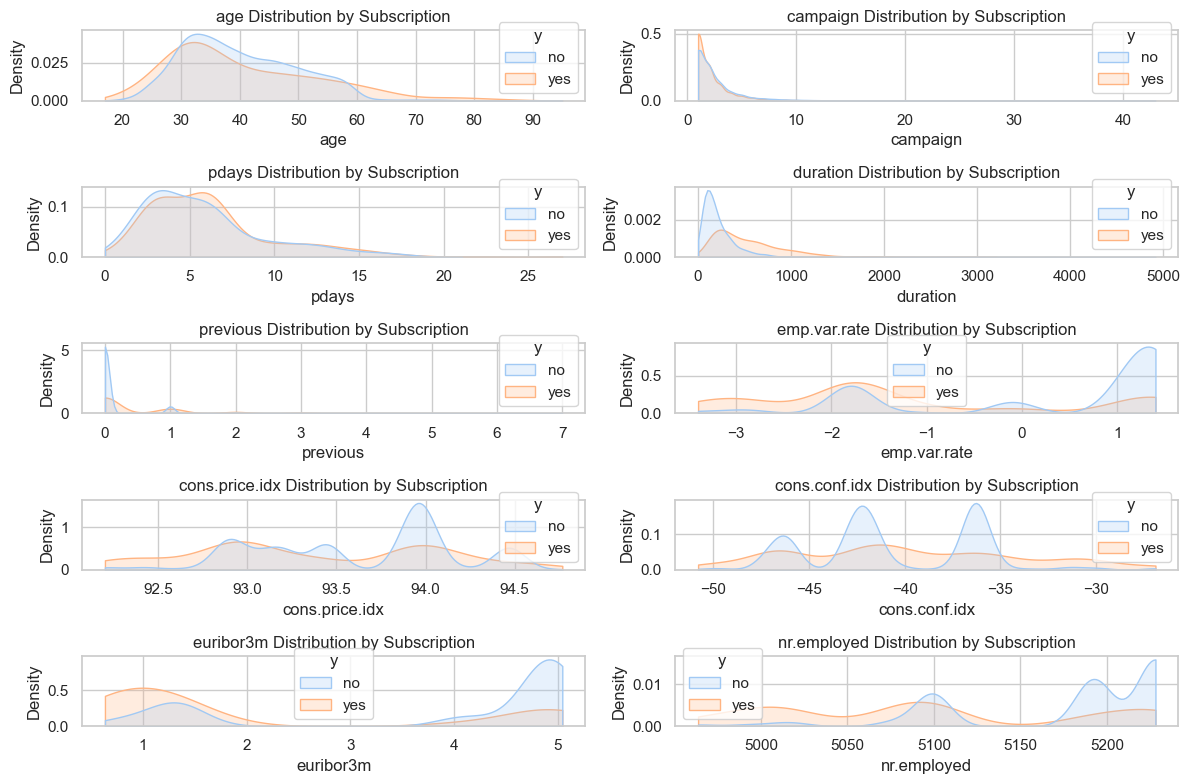

In [71]:
# produce kde plot for 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
plt.figure(figsize=(12, 8))
num_vars = ['age', 'campaign', 'pdays', 'duration', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
# make a copy of df
df_plot = df.copy()
# replace '999' with NaN in 'pdays'
df_plot['pdays'] = df_plot['pdays'].replace(999, np.nan)
for i, col in enumerate(num_vars):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(data=df_plot, x=col, hue='y', fill=True, common_norm=False, clip=[df_plot[col].min(), df_plot[col].max()])
    plt.title(f'{col} Distribution by Subscription')
plt.tight_layout()
plt.show()

/var/folders/xn/z5lmcb3d3nv2g9q29s3nmst80000gn/T/ipykernel_19998/3313789836.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_subscription_rate = df_plot.groupby('age_group')['y_numeric'].mean().reset_index()


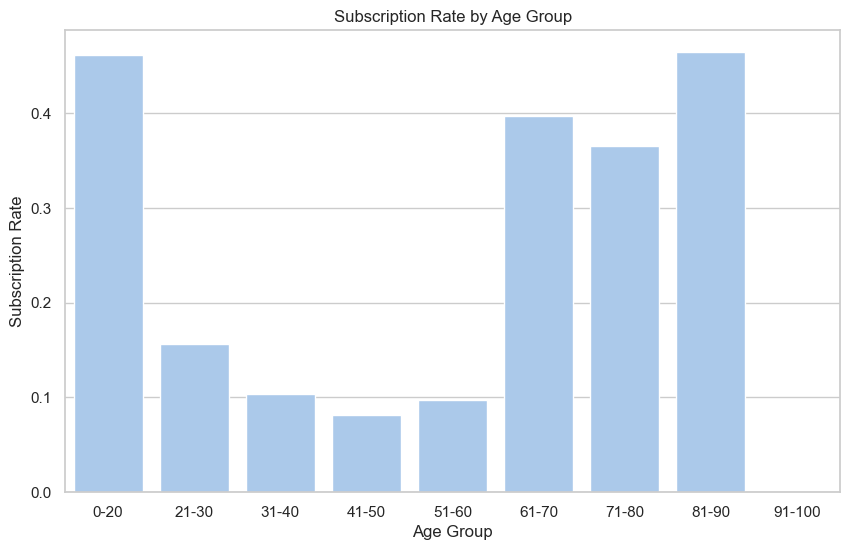

In [72]:
# Bin the age column into groups
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_plot['age_group'] = pd.cut(df_plot['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate subscription rate for each age group
df_plot['y_numeric'] = df_plot['y'].map({'no': 0, 'yes': 1})
age_group_subscription_rate = df_plot.groupby('age_group')['y_numeric'].mean().reset_index()

# Plot the subscription rate across different age groups
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='y_numeric', data=age_group_subscription_rate)
plt.title('Subscription Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.show()

/var/folders/xn/z5lmcb3d3nv2g9q29s3nmst80000gn/T/ipykernel_19998/1671676734.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  campaign_group_subscription_rate = df_plot.groupby('campaign_group')['y_numeric'].mean().reset_index()
/var/folders/xn/z5lmcb3d3nv2g9q29s3nmst80000gn/T/ipykernel_19998/1671676734.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pdays_group_subscription_rate = df_plot.groupby('pdays_group')['y_numeric'].mean().reset_index()
/var/folders/xn/z5lmcb3d3nv2g9q29s3nmst80000gn/T/ipykernel_19998/1671676734.py:19: FutureWarning: The default of observed=False is deprecated and will be chan

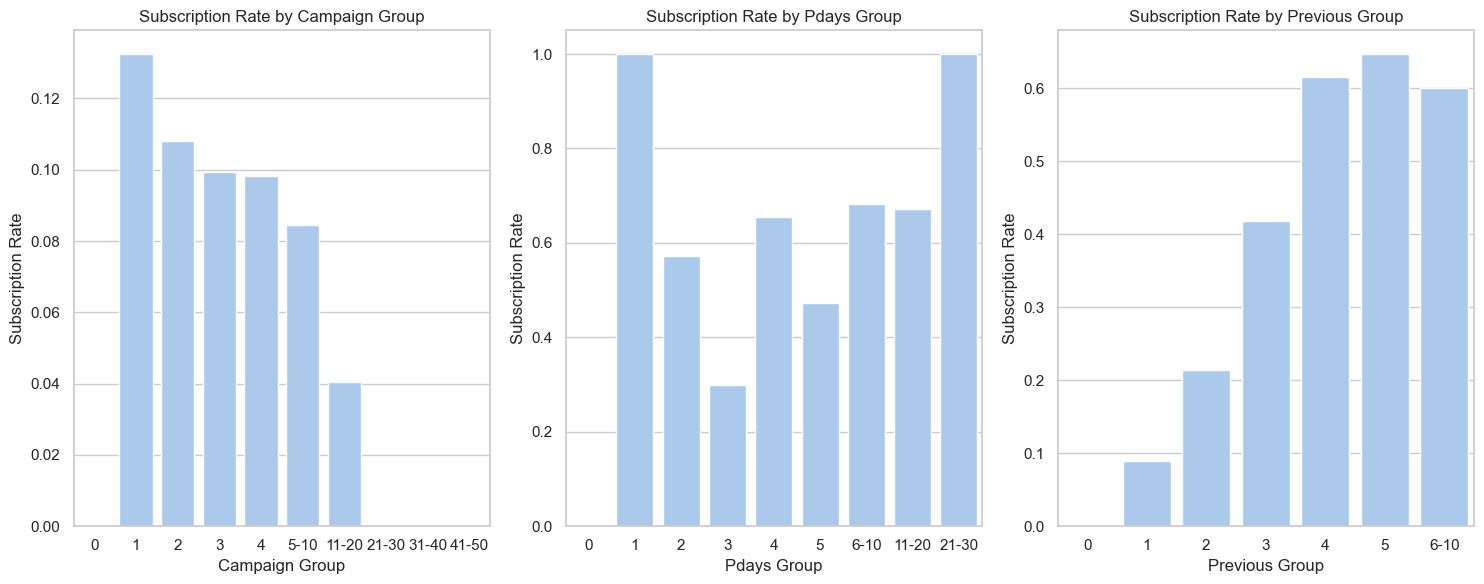

In [73]:

# Bin campaign, pdays and previous columns into groups
campaign_bins = [-1, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
campaign_labels = ['0', '1', '2', '3', '4', '5-10', '11-20', '21-30', '31-40', '41-50']
df_plot['campaign_group'] = pd.cut(df_plot['campaign'], bins=campaign_bins, labels=campaign_labels, right=False)

# Replace 999 with NaN in pdays
df_plot['pdays'] = df_plot['pdays'].replace(999, np.nan)
pdays_bins = [-1, 0, 1, 2, 3, 4, 5, 10, 20, 30]
pdays_labels = ['0', '1', '2', '3', '4', '5', '6-10', '11-20', '21-30']
df_plot['pdays_group'] = pd.cut(df_plot['pdays'], bins=pdays_bins, labels=pdays_labels, right=False)

previous_bins = [-1, 0, 1, 2, 3, 4, 5, 10]
previous_labels = ['0', '1', '2', '3', '4', '5', '6-10']
df_plot['previous_group'] = pd.cut(df_plot['previous'], bins=previous_bins, labels=previous_labels, right=False)

# Calculate subscription rate for each group
campaign_group_subscription_rate = df_plot.groupby('campaign_group')['y_numeric'].mean().reset_index()
pdays_group_subscription_rate = df_plot.groupby('pdays_group')['y_numeric'].mean().reset_index()
previous_group_subscription_rate = df_plot.groupby('previous_group')['y_numeric'].mean().reset_index()

# Plot the subscription rate across different groups
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='campaign_group', y='y_numeric', data=campaign_group_subscription_rate)
plt.title('Subscription Rate by Campaign Group')
plt.xlabel('Campaign Group')
plt.ylabel('Subscription Rate')

plt.subplot(1, 3, 2)
sns.barplot(x='pdays_group', y='y_numeric', data=pdays_group_subscription_rate)
plt.title('Subscription Rate by Pdays Group')
plt.xlabel('Pdays Group')
plt.ylabel('Subscription Rate')

plt.subplot(1, 3, 3)
sns.barplot(x='previous_group', y='y_numeric', data=previous_group_subscription_rate)
plt.title('Subscription Rate by Previous Group')
plt.xlabel('Previous Group')
plt.ylabel('Subscription Rate')

plt.tight_layout()
plt.show()

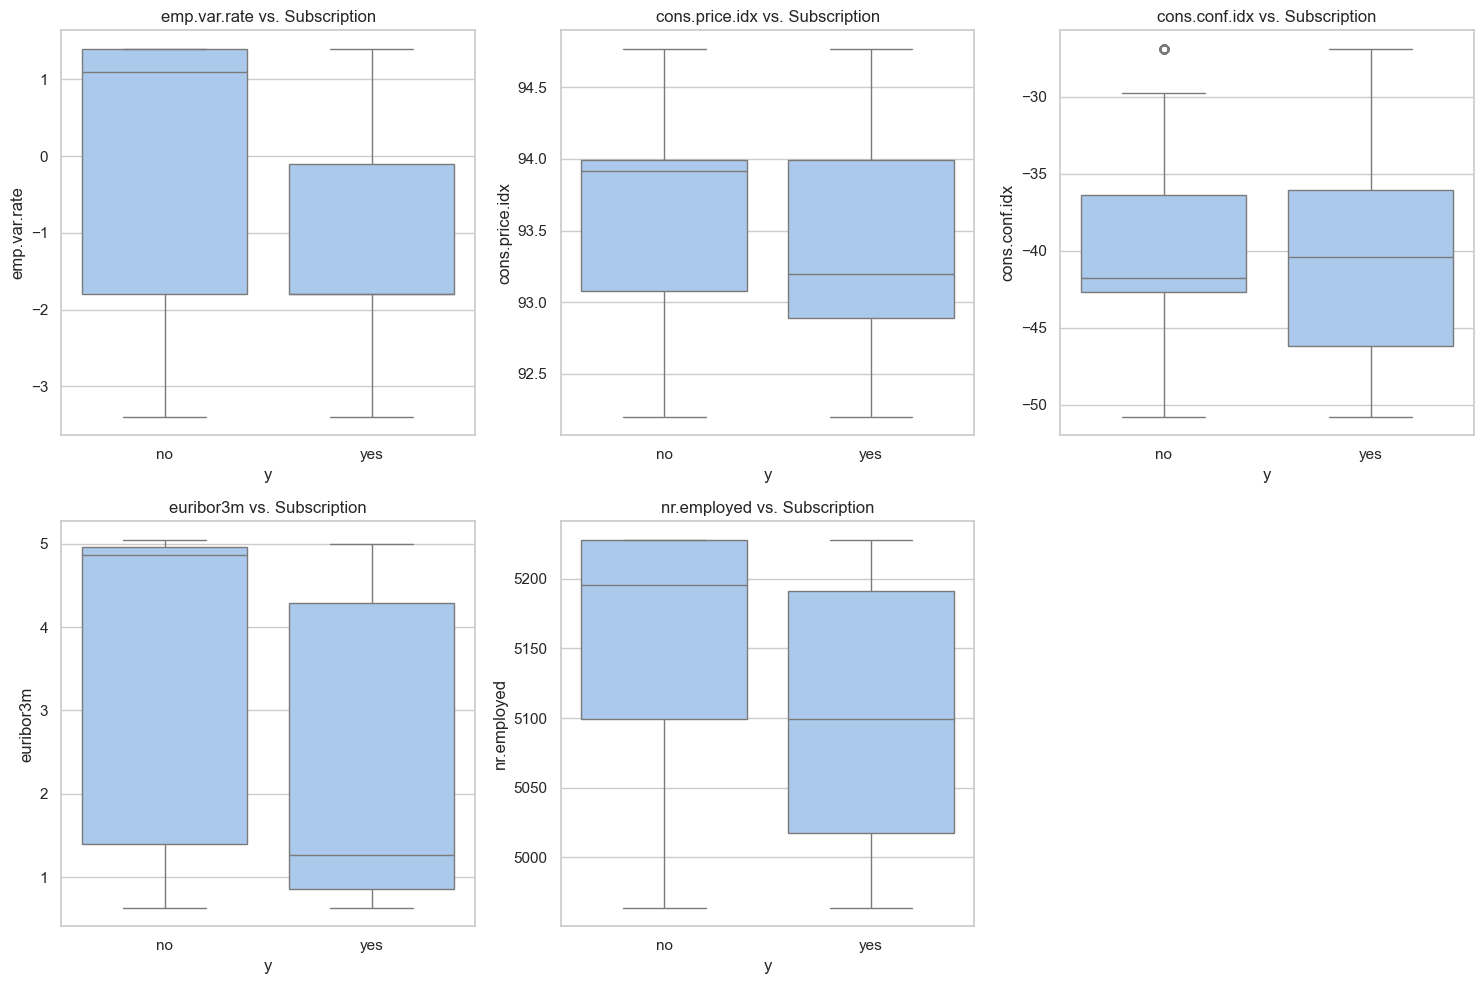

In [74]:
# ----- 2.2.4 Economic Indicators vs. Target -----
economic_vars = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

plt.figure(figsize=(15, 10))
for i, var in enumerate(economic_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='y', y=var, data=df)
    plt.title(f'{var} vs. Subscription')
plt.tight_layout()
plt.show()

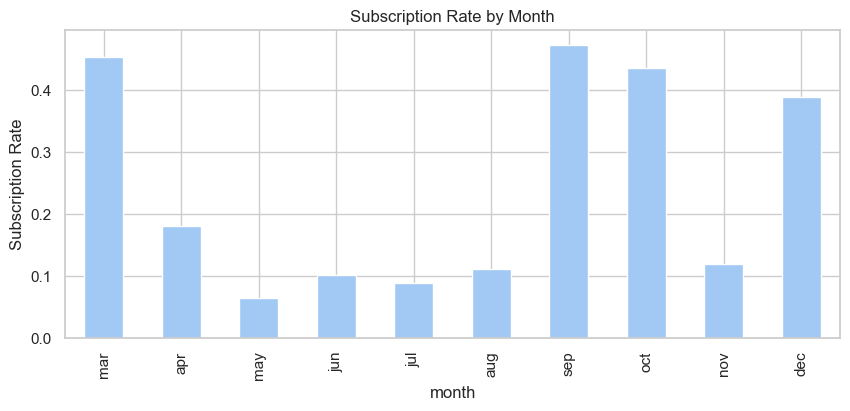

In [26]:
# ----- 2.4 Temporal Analysis -----
# Monthly subscription rates
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
plt.figure(figsize=(10, 4))
monthly_sub = df.groupby('month')['y'].apply(lambda x: (x == 'yes').mean()).reindex(month_order)
monthly_sub.plot(kind='bar')
plt.title('Subscription Rate by Month')
plt.ylabel('Subscription Rate')
plt.show()


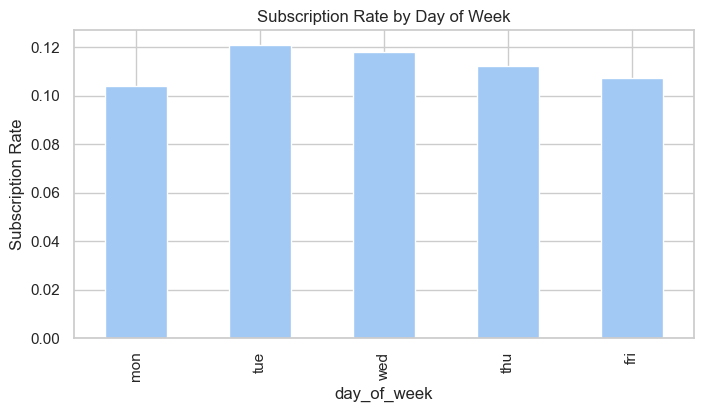

In [27]:
# Create bar chart displaying the subscription rate by day of week
plt.figure(figsize=(8, 4))
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']
day_sub = df.groupby('day_of_week')['y'].apply(lambda x: (x == 'yes').mean()).reindex(day_order)
day_sub.plot(kind='bar')
plt.title('Subscription Rate by Day of Week')
plt.ylabel('Subscription Rate')
plt.show()

#### 2.4 Correlation Analysis

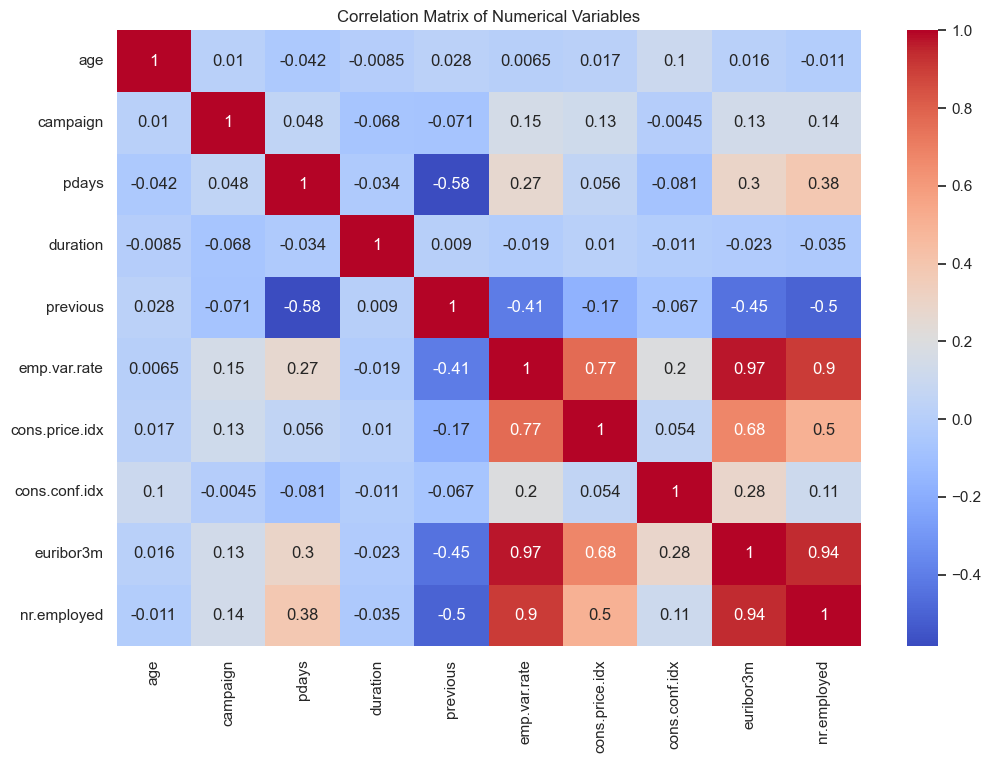

In [28]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df[num_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

#### 2.5 Statistical Tests of Independence

In [31]:
from scipy.stats import chi2_contingency, ttest_ind

# Function to perform chi-square test for categorical variables
def chi_square_test(df, cat_vars):
    results = []
    for var in cat_vars:
        temp_df = df.copy()
        temp_df[var] = temp_df[var].fillna('missing')  # Treat missing values as a separate category
        cont_table = pd.crosstab(temp_df['y'], temp_df[var])
        chi2, p, dof, expected = chi2_contingency(cont_table)
        results.append({'Variable': var, 'Chi2': chi2, 'P-Value': p, 'DOF': dof})
    return pd.DataFrame(results)

# Function to perform t-test for numerical variables
def t_test(df, num_vars):
    results = []
    for var in num_vars:
        ttest = ttest_ind(df.loc[df['y'] == 'yes', var], df.loc[df['y'] == 'no', var])
        results.append({'Variable': var, 'T-Statistic': ttest.statistic, 'P-Value': ttest.pvalue})
    return pd.DataFrame(results)

# List of categorical and numerical variables
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
num_vars = ['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Perform chi-square tests for categorical variables
chi2_results = chi_square_test(df_plot, cat_vars)
print("\nChi-Square Test Results")
print(chi2_results)

# Perform t-tests for numerical variables
ttest_results = t_test(df_plot, num_vars)
print("\nT-Test Results")
print(ttest_results)


Chi-Square Test Results
      Variable         Chi2        P-Value  DOF
0          job   249.574185   3.430670e-47   11
1      marital     9.765016   2.067292e-02    3
2    education    62.397735   5.004054e-11    7
3      default   100.403734   1.576182e-22    2
4      housing     7.914172   1.911874e-02    2
5         loan     3.754390   1.530187e-01    2
6      contact   202.443243   6.118957e-46    1
7        month   658.981994  4.521786e-136    9
8  day_of_week     3.934945   4.148817e-01    4
9     poutcome  1035.001487  1.787650e-225    2

T-Test Results
         Variable  T-Statistic        P-Value
0             age     2.065535   3.889808e-02
1    emp.var.rate   -31.292552  3.715172e-205
2  cons.price.idx   -13.561040   1.586053e-41
3   cons.conf.idx     5.489288   4.134199e-08
4       euribor3m   -32.038923  1.706533e-214
5     nr.employed   -37.616654  9.476473e-290


### Key Observations from EDA
- Missing values in job, education, merital, default, housing, and loan
- Class imbalance in target y: Only ~11.2% subscriptions ("yes") 
- Students and retired clients have higher subscription rates
- Clients with illiterate subscribe the most, however size is only 5, followed by university.degree
- Clients with prior poutcome as success are more likely to subscribe
- Younger clients (<20) and retirees (60+) show higher subscription rates.
- Most clients were contacted ≤ 5 times.
- Strong correlation between euribor3m, nr.employed, and emp.var.rate.
- Some seasonality appear 
- pdays: 96.8% of the values are 9f99, meaning they’ve never been contacted before
- previous: 87% of the values are 0
- campaign: 43% of values are 1, right skewed, the highest is 43

## 3. Data Pre-Processing and Feature Engineering

#### 3.1 Removal of Irrelevant/Problematic Columns

A copy of the original DataFrame (df) is created (df_processed), and certain columns ('duration' and 'default') are dropped to avoid data leakage and irrelevance.
For instance, 'duration' is known to be a strong post-call indicator that would not be available at prediction time in a real campaign.

#### 3.2 Handling Missing Values
Columns such as 'job', 'marital', 'education', 'housing', and 'loan' are filled with the mode (most frequent value). This ensures the dataset does not lose rows due to missingness.

#### 3.3 Target Variable & Binary Features
The target variable 'y' is mapped from {yes, no} to {1, 0}.
Two columns originally representing binary outcomes ('housing', 'loan') are also mapped from {yes, no} to {1, 0} for a numeric ML-friendly format.

#### 3.4 Feature Engineering
prev_campaign_contact: A binary flag indicating whether the client was contacted in a previous campaign (pdays != 999). The original 'pdays' column is then dropped.
Binning of 'month' into 'contact_recency' (seasons: 'spring', 'summer', 'fall', 'winter'). The 'month' column is removed after this binning.
prev_campaign: Another binary flag derived from whether 'previous' > 0, then the original 'previous' column is dropped.

#### 3.5 Dropping Low-Utility or Highly Correlated Columns

The columns 'day_of_week' and 'loan' are dropped based on prior statistical tests indicating weak or redundant predictive power.
Highly correlated columns ('emp.var.rate', 'nr.employed', 'cons.price.idx') are removed to reduce multicollinearity in the model.

#### 3.6 One-Hot Encoding

Categorical features such as 'job', 'marital', 'education', 'contact', 'poutcome', and 'contact_recency' are one-hot encoded, dropping the first category (drop_first=True) to avoid the dummy variable trap.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Drop Columns
df_processed = df.copy()  # Create working copy

#Remove problematic columns
df_processed = df_processed.drop(['duration', 'default'], axis=1)

# Fill missing values with mode
missing_cols = ['job', 'marital', 'education', 'housing', 'loan']
for col in missing_cols:
    df_processed[col] = df_processed[col].fillna(df_processed[col].mode()[0])

# Convert target variable
df_processed['y'] = df_processed['y'].map({'yes': 1, 'no': 0})

# Convert binary variables
df_processed['housing'] = df_processed['housing'].map({'yes': 1, 'no': 0})
df_processed['loan'] = df_processed['loan'].map({'yes': 1, 'no': 0})

# Create new feature 'prev_campaign_contact' based on 'pdays' values
df_processed['prev_campaign_contact'] = (df_processed['pdays'] != 999).astype(int)
df_processed = df_processed.drop('pdays', axis=1)

# Bin month into seasons
df_processed['contact_recency'] = np.where(
    df_processed['month'].isin(['mar', 'apr', 'may']), 'spring',
    np.where(df_processed['month'].isin(['jun', 'jul', 'aug']), 'summer',
    np.where(df_processed['month'].isin(['sep', 'oct', 'nov']), 'fall', 'winter'))
)
df_processed = df_processed.drop('month', axis=1)

# Convert previous to binary
df_processed['prev_campaign'] = (df_processed['previous'] > 0).astype(int)
df_processed = df_processed.drop('previous', axis=1)

# Drop unnecessary columns based on test of independence results
df_processed = df_processed.drop(['day_of_week', 'loan'], axis=1)

# Drop highly correlated columns to avoid multicollinearity
df_processed = df_processed.drop(['emp.var.rate', 'nr.employed', 'cons.price.idx'], axis=1)

onehot_features = ['job', 'marital', 'education', 'contact', 'poutcome', 'contact_recency']
df_processed = pd.get_dummies(df_processed, columns=onehot_features, drop_first=True)


## 4. Model Building 

#### 4.1 Initial Model Training & Class Imbalance Handling

##### 4.1.1 Class-Weight-Based Models
A set of candidate models are defined: LogisticRegression, RandomForestClassifier, SVC, and XGBClassifier.
For Logistic Regression, Random Forest, and SVC, an internal class-weight strategy ('balanced' or 'balanced_subsample') is used to handle class imbalance. For XGBoost, scale_pos_weight is set to the ratio of negatives to positives in the training data.
Evaluation

#### 4.1.2 SMOTE-based Models
Another snippet shows how SMOTE-based oversampling can be introduced in the pipeline instead of or in addition to internal class-weight adjustments.
The code presents a “with SMOTE” scenario to compare performance versus purely class-weight-based approaches.

#### 4.1.3 Model Evaluation
The pipeline is trained on the training set, then predictions (and probabilities) are generated on the test set.
Standard classification metrics (accuracy, precision, recall, F1, and ROC-AUC) are computed and logged, along with a confusion matrix.
This serves as a baseline comparison across multiple algorithms with straightforward imbalance handling.


#### 4.2 Fine-Tuning Logistic Regression
##### 4.2.1 Hyperparameter Search
A GridSearchCV process is built around a pipeline of StandardScaler → LogisticRegression.
Multiple parameter sets are tried:
- Solvers: 'lbfgs', 'liblinear', 'saga'
- Penalties: 'l2' (plus 'l1' for liblinear and saga)
- Regularization Strength C: [0.01, 0.1, 1, 10]
- max_iter: [100, 300]
- class_weight: [None, 'balanced']
- scoring='recall' ensures that the cross-validation focuses on maximizing recall.
- grid_search_lr.best_estimator_ yields the model variant with the highest recall in CV.
- The code evaluates this best model on the test set at the default threshold of 0.5, printing confusion matrix and metrics.
##### 4.2.2 Threshold Optimization
Since the primary goal is maximizing recall but with a minimum precision constraint, the code defines a function to sweep thresholds (0..1 in steps of 0.01).
Each threshold is tested by predicting “1” when predicted_probability >= threshold. Only thresholds that yield a precision≥0.2 are considered valid; among those, the threshold that gives the highest recall is selected. This ensures recall is pushed as high as possible without letting precision drop below 20%.

In [ ]:
### Train-Test Split

import pandas as pd
import numpy as np
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             PrecisionRecallDisplay, RocCurveDisplay, roc_curve)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

X = df_processed.drop('y', axis=1)
y = df_processed['y']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Model Selection

In [82]:
##############################
# Approach 1: Class Weight / scale_pos_weight
##############################
results_classweight = []

models_1 = [
    LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    RandomForestClassifier(class_weight='balanced_subsample', random_state=42),
    SVC(class_weight='balanced', probability=True, random_state=42),
    XGBClassifier(
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
        use_label_encoder=False, 
        eval_metric='logloss',
        random_state=42
    )
]

for model in models_1:
    pipeline = make_pipeline(
        StandardScaler(),
        model
    )
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n=== {model.__class__.__name__} (ClassWeight) ===")
    print(pd.DataFrame(cm, index=['Actual 0','Actual 1'], columns=['Pred 0','Pred 1']))
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC AUC: {auc:.4f}")
    
    results_classweight.append({
        'Approach': 'ClassWeight',
        'Model': model.__class__.__name__,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1,
        'ROC_AUC': auc
    })


##############################
# Approach 2: SMOTE
##############################
results_smote = []

models_2 = [
    LogisticRegression(max_iter=1000, random_state=42),
    RandomForestClassifier(random_state=42),
    SVC(probability=True, random_state=42),
    XGBClassifier(
        use_label_encoder=False, 
        eval_metric='logloss',
        random_state=42
    )
]

from imblearn.pipeline import make_pipeline

for model in models_2:
    pipeline = make_pipeline(
        SMOTE(random_state=42),
        StandardScaler(),
        model
    )
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n=== {model.__class__.__name__} (SMOTE) ===")
    print(pd.DataFrame(cm, index=['Actual 0','Actual 1'], columns=['Pred 0','Pred 1']))
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC AUC: {auc:.4f}")
    
    results_smote.append({
        'Approach': 'SMOTE',
        'Model': model.__class__.__name__,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1,
        'ROC_AUC': auc
    })



=== LogisticRegression (ClassWeight) ===
          Pred 0  Pred 1
Actual 0    1425     350
Actual 1      81     144
Accuracy: 0.7845, Precision: 0.2915, Recall: 0.6400, F1: 0.4006, ROC AUC: 0.7663

=== RandomForestClassifier (ClassWeight) ===
          Pred 0  Pred 1
Actual 0    1727      48
Actual 1     170      55
Accuracy: 0.8910, Precision: 0.5340, Recall: 0.2444, F1: 0.3354, ROC AUC: 0.7635

=== SVC (ClassWeight) ===
          Pred 0  Pred 1
Actual 0    1522     253
Actual 1      95     130
Accuracy: 0.8260, Precision: 0.3394, Recall: 0.5778, F1: 0.4276, ROC AUC: 0.7634

=== XGBClassifier (ClassWeight) ===
          Pred 0  Pred 1
Actual 0    1578     197
Actual 1     122     103
Accuracy: 0.8405, Precision: 0.3433, Recall: 0.4578, F1: 0.3924, ROC AUC: 0.7319

=== LogisticRegression (SMOTE) ===
          Pred 0  Pred 1
Actual 0    1608     167
Actual 1     133      92
Accuracy: 0.8500, Precision: 0.3552, Recall: 0.4089, F1: 0.3802, ROC AUC: 0.7062

=== RandomForestClassifier (SMO

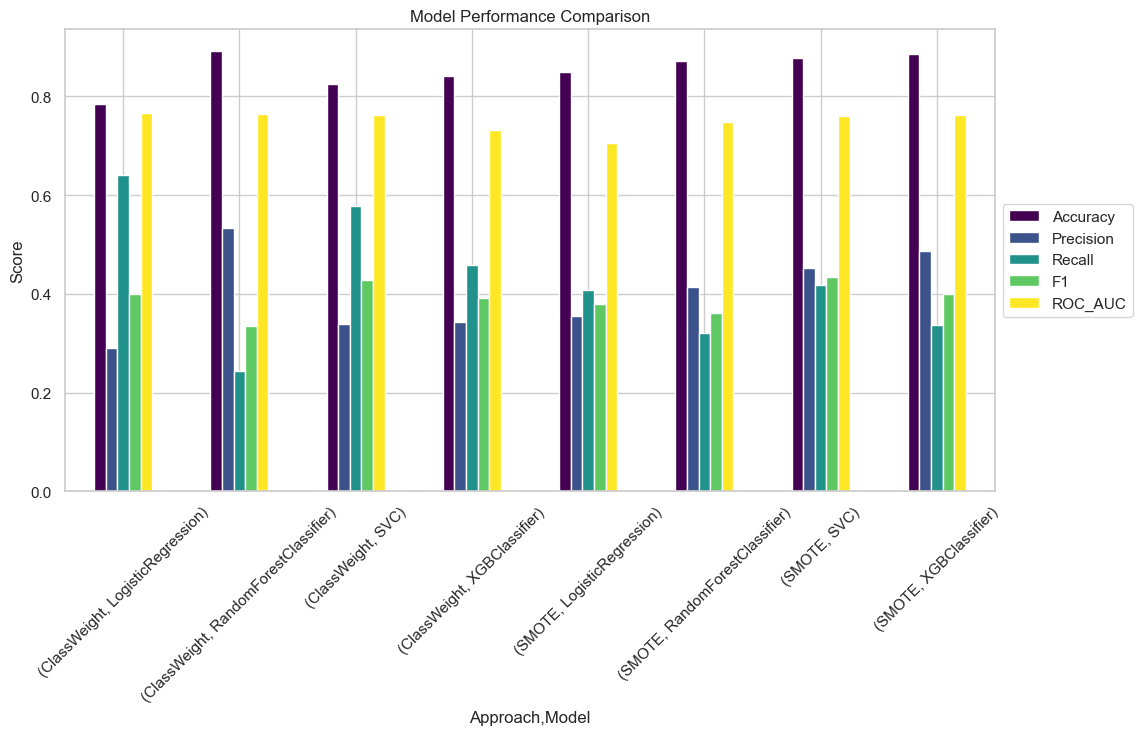

In [ ]:
# Visualize the results 
results_df = pd.DataFrame(results_classweight + results_smote)
results_df = results_df.set_index(['Approach', 'Model'])
results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

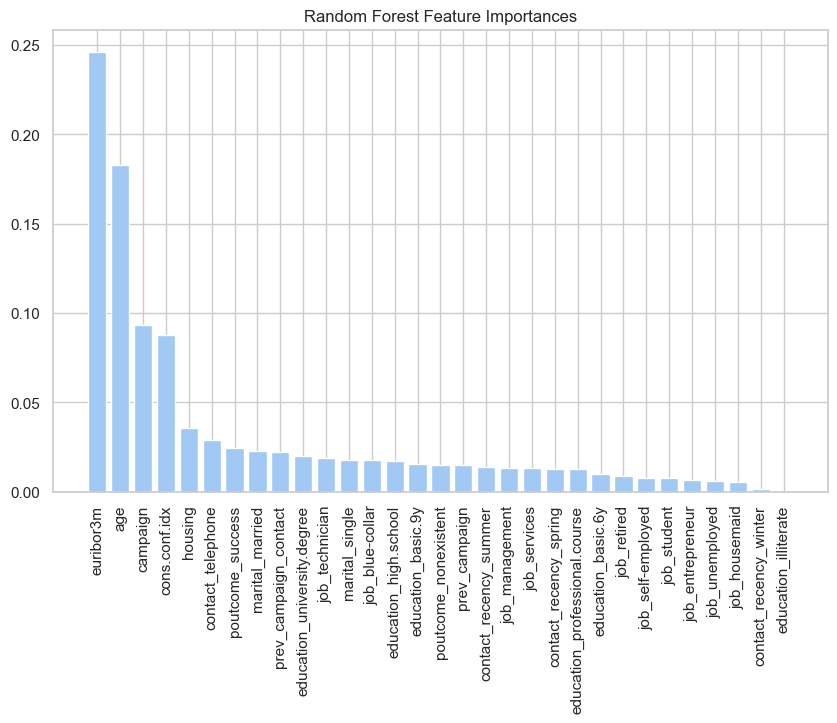

In [43]:
# plot random forest feature importance
rf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)
pipeline = make_pipeline(
    StandardScaler(),
    rf
)
pipeline.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.title('Random Forest Feature Importances')
plt.show()


#### Fine tune Logistic Regression

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END logreg__C=0.01, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs; total time=   0.0s
[CV] END logreg__C=0.01, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs; total time=   0.0s
[CV] END logreg__C=0.01, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs; total time=   0.0s
[CV] END logreg__C=0.01, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=lbfgs; total time=   0.0s
[CV] END logreg__C=0.01, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=lbfgs; total time=   0.0s
[CV] END logreg__C=0.01, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=lbfgs; total time=   0.0s
[CV] END logreg__C=0.01, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=lbfgs; total time= 

/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logreg__C=0.01, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.1s
[CV] END logreg__C=0.01, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=0.01, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=0.01, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.1s
[CV] END logreg__C=0.1, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.1s
[CV] END logreg__C=0.1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=0.01, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.1s
[CV] END logreg__C=0.1, logreg__class_weight=None, l

/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logreg__C=0.01, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.1s
[CV] END logreg__C=0.01, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=0.1, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=0.1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=0.01, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.4s
[CV] END logreg__C=0.01, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=0.1, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=0.01, logreg__class_weight=balance

/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logreg__C=0.01, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.1s
[CV] END logreg__C=0.01, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=0.01, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=0.01, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.1s
[CV] END logreg__C=0.01, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=0.01, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.1s
[CV] END logreg__C=0.01, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=0.1, logreg__class_weight=N

/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logreg__C=0.1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=0.01, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=0.01, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.1s
[CV] END logreg__C=0.1, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.1s
[CV] END logreg__C=0.1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=0.1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s


/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logreg__C=0.1, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=0.1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=0.01, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.4s
[CV] END logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=0.1, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=0.1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=0.1, logreg__class_weight=balanced, logreg__m

/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logreg__C=0.1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.1s
[CV] END logreg__C=1, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=1, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=0.1, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=0.1, logreg__class_weight=None, logreg__max_

/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=1, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=0.1, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=1, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s


/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logreg__C=0.1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=0.1, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=10, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.4s
[CV] END logreg__C=1, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=1, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s


/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.5s
[CV] END logreg__C=0.1, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=0.1, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.4s
[CV] END logreg__C=10, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.4s


/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logreg__C=1, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=1, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.4s
[CV] END logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=0.1, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=0.1, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.3s


/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logreg__C=10, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=10, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=1, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=10, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s


/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=10, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=1, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.3s


/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logreg__C=1, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.4s
[CV] END logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=10, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.4s
[CV] END logreg__C=10, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l1, logreg__solver=saga; total time=   0.4s
[CV] END logreg__C=10, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=1, logreg__class_weight=balanced, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=10, logreg__class_weight=None, logreg__max_iter=3

/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zil

[CV] END logreg__C=10, logreg__class_weight=None, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=10, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=10, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=10, logreg__class_weight=None, logreg__max_iter=300, logreg__penalty=l2, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=1, logreg__class_weight=balanced, logreg__max

/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ziluwang/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zil

[CV] END logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l1, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.2s
[CV] END logreg__C=10, logreg__class_weight=balanced, logreg__max_iter=100, logreg__penalty=l2, logreg__solver=saga; total time=   0.3s
[CV] END logreg__C=10, logreg__class_weight=bala

,Feature,Coefficient
4,euribor3m,-0.767328
28,contact_recency_spring,-0.278657
5,prev_campaign_contact,0.206624
27,poutcome_success,0.075365
11,job_retired,0.070380
7,job_blue-collar,-0.060767
14,job_student,0.055769
26,poutcome_nonexistent,0.048457
3,cons.conf.idx,0.045506
25,contact_telephone,-0.041104


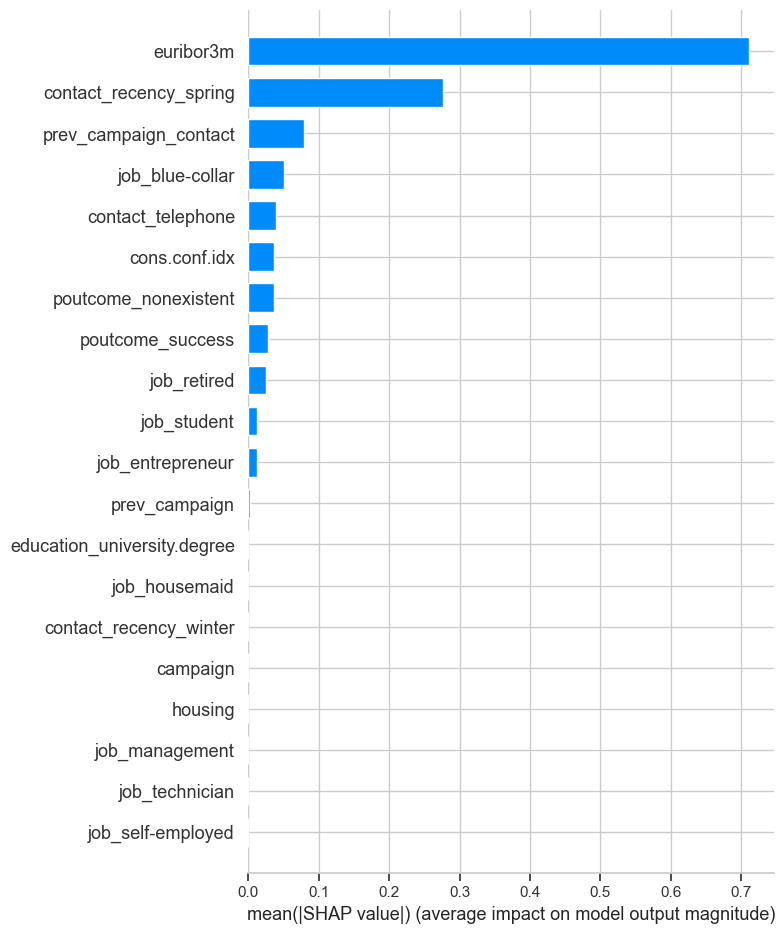

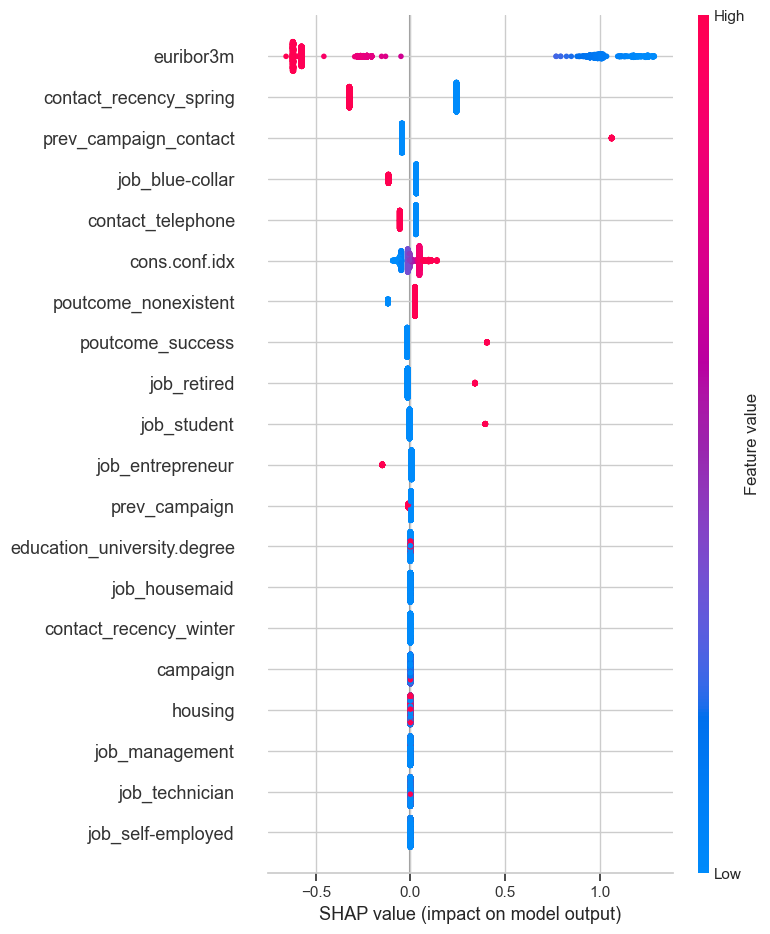

In [89]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score
)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import warnings

# Option 1: Ignore all warnings
warnings.filterwarnings('ignore')

########################
# 1. Build Pipeline
########################
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

########################
# 2. Define Param Grid
########################
param_grid_lr = [
    # (1) lbfgs scenario
    {
        'logreg__solver': ['lbfgs'],
        'logreg__penalty': ['l2'],       # only valid for lbfgs
        'logreg__C': [0.01, 0.1, 1, 10],
        'logreg__max_iter': [100, 300],
        'logreg__class_weight': [None, 'balanced']
    },
    # (2) liblinear scenario
    {
        'logreg__solver': ['liblinear'],
        'logreg__penalty': ['l1', 'l2'], # liblinear supports l1 or l2
        'logreg__C': [0.01, 0.1, 1, 10],
        'logreg__max_iter': [100, 300],
        'logreg__class_weight': [None, 'balanced']
    },
    # (3) saga scenario
    {
        'logreg__solver': ['saga'],
        'logreg__penalty': ['l1', 'l2'], 
        'logreg__C': [0.01, 0.1, 1, 10],
        'logreg__max_iter': [100, 300],
        'logreg__class_weight': [None, 'balanced']
    }
]

########################
# 3. GridSearchCV
########################
grid_search_lr = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=param_grid_lr,
    scoring='recall',   # we want to maximize recall in CV
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search_lr.fit(X_train, y_train)

print("Best Params:", grid_search_lr.best_params_)
print("Best Recall (CV):", grid_search_lr.best_score_)

best_lr_pipeline = grid_search_lr.best_estimator_

########################
# 4. Evaluate @ 0.5
########################
y_proba_05 = best_lr_pipeline.predict_proba(X_test)[:,1]
y_pred_05 = (y_proba_05 >= 0.5).astype(int)

acc_05 = accuracy_score(y_test, y_pred_05)
prec_05 = precision_score(y_test, y_pred_05, zero_division=0)
rec_05  = recall_score(y_test, y_pred_05)
f1_05   = f1_score(y_test, y_pred_05)
auc_05  = roc_auc_score(y_test, y_proba_05)
cm_05   = confusion_matrix(y_test, y_pred_05)

print("\n=== LR (Best Pipeline) @ 0.5 ===")
print("Confusion Matrix:")
print(pd.DataFrame(cm_05, index=['Actual 0','Actual 1'],
                   columns=['Pred 0','Pred 1']))
print(f"Accuracy:  {acc_05:.4f}")
print(f"Precision: {prec_05:.4f}")
print(f"Recall:    {rec_05:.4f}")
print(f"F1 Score:  {f1_05:.4f}")
print(f"ROC AUC:   {auc_05:.4f}")

########################
# 5. Find Threshold for 
#    Max Recall 
#    subject to min Precision
########################
def find_best_threshold_for_recall_min_prec(y_true, y_scores, min_precision=0.2):
    thresholds = np.linspace(0, 1, 101)
    best_recall = 0.0
    best_thresh = 0.5
    best_prec = 0.0
    best_f1 = 0.0
    
    for th in thresholds:
        y_pred = (y_scores >= th).astype(int)
        prec = precision_score(y_true, y_pred, zero_division=0)
        rec = recall_score(y_true, y_pred)
        
        # Keep only thresholds that achieve at least min_precision
        if prec >= min_precision and rec > best_recall:
            best_recall = rec
            best_prec = prec
            best_thresh = th
            best_f1 = f1_score(y_true, y_pred)
    
    return best_thresh, best_recall, best_prec, best_f1

min_precision = 0.2
best_thresh, best_recall, best_prec, best_f1 = find_best_threshold_for_recall_min_prec(
    y_test, y_proba_05, min_precision=min_precision
)
y_pred_opt = (y_proba_05 >= best_thresh).astype(int)

acc_opt = accuracy_score(y_test, y_pred_opt)
auc_opt = roc_auc_score(y_test, y_proba_05)
cm_opt = confusion_matrix(y_test, y_pred_opt)

print(f"\n=== LR (Best Pipeline) @ Threshold => Max Recall w/ Precision≥{min_precision} ===")
print(f"Threshold: {best_thresh:.2f}")
print("Confusion Matrix:")
print(pd.DataFrame(cm_opt, index=['Actual 0','Actual 1'],
                   columns=['Pred 0','Pred 1']))
print(f"Accuracy:  {acc_opt:.4f}")
print(f"Precision: {best_prec:.4f}")
print(f"Recall:    {best_recall:.4f}")
print(f"F1 Score:  {best_f1:.4f}")
print(f"ROC AUC:   {auc_opt:.4f}")

# Extract the logistic regression model from your best pipeline
best_logreg = best_lr_pipeline.named_steps['logreg']

# If X_train is a DataFrame, get the feature names:
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"feat_{i}" for i in range(X_train.shape[1])]

# best_logreg.coef_ is shape (1, n_features) for binary logistic regression
coef_values = best_logreg.coef_[0]
intercept_value = best_logreg.intercept_[0]

# Create a DataFrame of coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef_values
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df.sort_values('Abs_Coefficient', ascending=False, inplace=True)

print("Intercept (bias):", intercept_value)
print("\nCoefficients (largest to smallest):")
display(coef_df.drop(columns=['Abs_Coefficient']))

import shap

# Extract the logistic model
best_logreg = best_lr_pipeline.named_steps['logreg']

# Transform your X_train / X_test using the pipeline’s scaler
X_train_scaled = best_lr_pipeline.named_steps['scaler'].transform(X_train)
X_test_scaled = best_lr_pipeline.named_steps['scaler'].transform(X_test)

# SHAP Explainer for logistic regression
explainer = shap.LinearExplainer(
    best_logreg,
    X_train_scaled,  # background data
    feature_names=feature_names,  # if you have them
    link=shap.links.logit         # logistic link for better interpretation
)

# Compute SHAP values for X_test
shap_values = explainer(X_test_scaled)  # Returns a values matrix

# Summarize and visualize
shap.summary_plot(shap_values, X_test_scaled, 
                  feature_names=feature_names, 
                  plot_type='bar')

# Beeswarm plot to see distribution
shap.summary_plot(shap_values, X_test_scaled, 
                  feature_names=feature_names)


### Fine tune Random Forest 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END rf__class_weight=None, rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=100; total time=   0.6s
[CV] END rf__class_weight=None, rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=100; total time=   0.6s
[CV] END rf__class_weight=None, rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=100; total time=   0.6s
[CV] END rf__class_weight=None, rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=100; total time=   0.7s
[CV] END rf__class_weight=None, rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=100; total time=   0.6s
[CV] END rf__class_weight=None, rf__max_depth=None, rf__min_samples_split=5, rf__n_estimators=100; total time=   0.6s
[CV] END rf__class_weight=None, rf__max_depth=None, rf__min_samples_split=5, rf__n_estimators=100; total time=   0.6s
[CV] END rf__class_weight=None, rf__max_depth=None, rf__min_samples_split=5, rf__n_estimators=100; total time=  

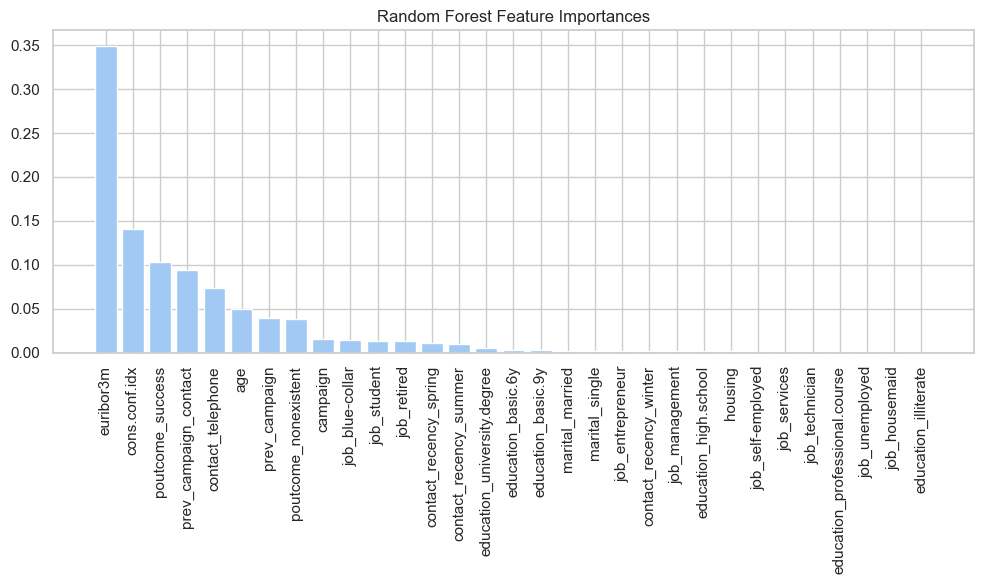

In [92]:
# 2.1 Pipeline
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# 2.2 Parameter grid (example)
param_grid_rf = {
    'rf__n_estimators': [100, 300],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5],
    'rf__class_weight': [None, 'balanced']  # might help with imbalance
}

grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring='recall',
    cv=5,
    n_jobs=-1,       # parallelize if environment is stable
    verbose=2
)

grid_search_rf.fit(X_train, y_train)

print("Best RF Params:", grid_search_rf.best_params_)
print("Best Recall (CV):", grid_search_rf.best_score_)

best_rf_pipeline = grid_search_rf.best_estimator_

y_proba_05 = best_rf_pipeline.predict_proba(X_test)[:,1]
y_pred_05 = (y_proba_05 >= 0.5).astype(int)

acc_05 = accuracy_score(y_test, y_pred_05)
prec_05 = precision_score(y_test, y_pred_05)
rec_05  = recall_score(y_test, y_pred_05)
f1_05   = f1_score(y_test, y_pred_05)
auc_05  = roc_auc_score(y_test, y_proba_05)
cm_05   = confusion_matrix(y_test, y_pred_05)

print("\n=== RandomForest (Best Pipeline) @ threshold=0.5 ===")
print("Confusion Matrix:")
print(pd.DataFrame(cm_05, index=['Actual 0','Actual 1'],
                   columns=['Pred 0','Pred 1']))
print(f"Accuracy:  {acc_05:.4f}")
print(f"Precision: {prec_05:.4f}")
print(f"Recall:    {rec_05:.4f}")
print(f"F1 Score:  {f1_05:.4f}")
print(f"ROC AUC:   {auc_05:.4f}")

def find_best_threshold_for_recall_min_prec(y_true, y_scores, min_precision=0.2):
    """
    Sweeps thresholds from 0..1. 
    Returns (best_threshold, best_recall, best_precision, best_f1)
    for the threshold that yields the highest recall while 
    maintaining precision >= min_precision.
    """
    thresholds = np.linspace(0, 1, 101)
    best_recall = 0.0
    best_thresh = 0.5
    best_prec = 0.0
    best_f1 = 0.0
    
    for th in thresholds:
        y_pred_th = (y_scores >= th).astype(int)
        prec_th = precision_score(y_true, y_pred_th, zero_division=0)
        rec_th = recall_score(y_true, y_pred_th)
        
        # Only consider threshold if precision >= min_precision
        if prec_th >= min_precision and rec_th > best_recall:
            best_recall = rec_th
            best_thresh = th
            best_prec = prec_th
            best_f1 = f1_score(y_true, y_pred_th)
    
    return best_thresh, best_recall, best_prec, best_f1

min_precision = 0.2
best_thresh, best_recall, best_prec, best_f1 = find_best_threshold_for_recall_min_prec(
    y_test, y_proba_05, min_precision=min_precision
)

# Make new predictions at the best threshold
y_pred_opt = (y_proba_05 >= best_thresh).astype(int)

acc_opt = accuracy_score(y_test, y_pred_opt)
auc_opt = roc_auc_score(y_test, y_proba_05)
cm_opt = confusion_matrix(y_test, y_pred_opt)

print(f"\n=== RandomForest (Best Pipeline) @ Threshold => Max Recall w/ Precision≥{min_precision} ===")
print(f"Optimal threshold: {best_thresh:.2f}")
print("Confusion Matrix:")
print(pd.DataFrame(cm_opt, index=['Actual 0','Actual 1'],
                   columns=['Pred 0','Pred 1']))
print(f"Accuracy:  {acc_opt:.4f}")
print(f"Precision: {best_prec:.4f}")
print(f"Recall:    {best_recall:.4f}")
print(f"F1 Score:  {best_f1:.4f}")
print(f"ROC AUC:   {auc_opt:.4f}")

import matplotlib.pyplot as plt
import numpy as np

# 1) Extract the trained RF model from the pipeline
rf_model = best_rf_pipeline.named_steps['rf']

# 2) If X_train is a DataFrame, get feature names:
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]

# 3) Get feature importances
importances = rf_model.feature_importances_

# 4) Sort features by importance (descending)
indices = np.argsort(importances)[::-1]

# 5) Plot
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

## Conclusion

After evaluating both Logistic Regression and Random Forest models, we selected Random Forest as our final classifier due to its highest recall (approximately 74.7%) when tuned to maintain a minimum precision of 20%. This ensures we capture the largest fraction of potential subscribers (true positives) even though it modestly increases false positives. To interpret the Random Forest, we examined feature importances and SHAP values. Both methods consistently highlight euribor3m as the most influential feature, indicating that changes in the three-month Euro Interbank Offered Rate strongly affect the model’s predictions. Additional key factors include contact_recency_spring (the season of contact), prev_campaign_contact (whether the customer was contacted in a previous campaign), and job type (e.g., “blue-collar”). Overall, higher or lower values of these features can shift an individual’s predicted probability of subscription. Through this combined approach—tuning for recall and explaining the model’s decision process—we ensure the Random Forest not only maximizes successful term-deposit subscriptions but also provides insight into the main drivers behind its predictions.